In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from datetime import datetime

In [202]:
transactions = pd.read_excel('/Users/stellarnode/Desktop/transactions_2018-01-01-00-00_2020-01-31-00-00.xlsx')

In [203]:
ga_data = pd.read_excel('/Users/stellarnode/OneDrive/MTS/mts innovation center/sales/analysis/Analytics Smart-university All Traffic 20190101-20191119.xlsx', sheet_name = 'Dataset2')

In [204]:
# type(ga_data['Day Index'][3])

In [205]:
ga_data['Datetime_datetime'] = pd.to_datetime(ga_data['Day Index'])

In [206]:
# type(ga_data)

In [207]:
ga_data['Datetime_datetime'].head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: Datetime_datetime, dtype: datetime64[ns]

In [208]:
# transactions.info()

In [209]:
transactions['Date'] = transactions['Дата списания'].apply(lambda x: str(x).split(' ')[0])
transactions['Month'] = transactions['Дата списания'].apply(lambda x: str(x).split(' ')[0][:7])
transactions['Date_general'] = transactions['Дата'].apply(lambda x: str(x).split(' ')[0])
transactions['Month_general'] = transactions['Дата'].apply(lambda x: str(x).split(' ')[0][:7])
transactions['Datetime'] = transactions['Date'].apply(lambda x: x if x == 'nan' else datetime.strptime(x, '%Y.%m.%d'))

In [210]:
# type(transactions['Datetime'][3])

In [211]:
transactions['Datetime_datetime'] = pd.to_datetime(transactions['Datetime'])

In [212]:
transactions['Datetime_datetime'].head()

0   2020-01-30
1   2020-01-29
2   2020-01-29
3          NaT
4          NaT
Name: Datetime_datetime, dtype: datetime64[ns]

In [213]:
# Daily sales (sorted by top 20)

In [214]:
transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Date')['Сумма подтверждения'].sum().sort_values(ascending=False).head(20)

Date
2019.01.10    114397
2019.11.11    109690
2019.10.23    107880
2019.11.14     87920
2020.01.28     83910
2019.11.20     81900
2019.08.13     81420
2019.10.25     80950
2019.03.29     72250
2019.08.28     70560
2019.11.12     69940
2020.01.27     69280
2019.09.02     67980
2019.09.14     64950
2019.11.26     64390
2019.09.05     61367
2019.08.11     60440
2019.07.27     59180
2019.08.14     58760
2020.01.20     58550
Name: Сумма подтверждения, dtype: int64

In [215]:
sales_by_day_to_merge = transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Datetime_datetime')['Сумма подтверждения'].sum()

In [216]:
sales_by_day_to_merge = pd.DataFrame(sales_by_day_to_merge)

In [217]:
ga_data = ga_data.join(sales_by_day_to_merge, on='Datetime_datetime')

In [218]:
ga_data.tail(10)

,Day Index,Запись на бесплатный урок (Goal 14 Completions),Datetime_datetime,Сумма подтверждения
314,2019-11-11,89,2019-11-11,109690.0
315,2019-11-12,68,2019-11-12,69940.0
316,2019-11-13,58,2019-11-13,21480.0
317,2019-11-14,83,2019-11-14,87920.0
318,2019-11-15,62,2019-11-15,39960.0
319,2019-11-16,57,2019-11-16,37500.0
320,2019-11-17,52,2019-11-17,47960.0
321,2019-11-18,59,2019-11-18,22970.0
322,2019-11-19,142,2019-11-19,48950.0
323,NaT,8270,NaT,NaN


In [219]:
ga_data_for_export = ga_data.drop('Datetime_datetime', axis = 1)

In [220]:
# Normalize data

In [221]:
ga_data_for_export['Requests_normalized'] = (ga_data_for_export['Запись на бесплатный урок (Goal 14 Completions)']-ga_data_for_export['Запись на бесплатный урок (Goal 14 Completions)'].min())/(ga_data_for_export['Запись на бесплатный урок (Goal 14 Completions)'].max()-ga_data_for_export['Запись на бесплатный урок (Goal 14 Completions)'].min())

In [222]:
ga_data_for_export['Income_normalized'] = (ga_data_for_export['Сумма подтверждения']-ga_data_for_export['Сумма подтверждения'].min())/(ga_data_for_export['Сумма подтверждения'].max()-ga_data_for_export['Сумма подтверждения'].min())

In [223]:
# ga_data_for_export.to_excel('/Users/stellarnode/Desktop/ga_data_for_export.xls')

In [224]:
sales_by_day_to_merge.tail()

,Сумма подтверждения
Datetime_datetime,
2020-01-26,13980
2020-01-27,69280
2020-01-28,83910
2020-01-29,40520
2020-01-30,4990


In [225]:
sales_by_day = transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Date')['Сумма подтверждения'].sum()

In [226]:
# Monthly sales (sorted by max and then sorted by month)

In [227]:
transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Month')['Сумма подтверждения'].sum().sort_values(ascending=False)

Month
2019.11    1025050
2019.08     994610
2019.10     928338
2020.01     842880
2019.09     800337
2019.12     775401
2019.03     592443
2019.04     516757
2019.01     478233
2019.06     449561
2019.05     445632
2019.07     443225
2019.02     320277
2018.12     319352
2018.10     164425
2018.11     156464
2018.09      87803
2018.08      55517
2018.07       3395
2018.05        170
2018.06        134
Name: Сумма подтверждения, dtype: int64

In [228]:
transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Month')['Сумма подтверждения'].sum()

Month
2018.05        170
2018.06        134
2018.07       3395
2018.08      55517
2018.09      87803
2018.10     164425
2018.11     156464
2018.12     319352
2019.01     478233
2019.02     320277
2019.03     592443
2019.04     516757
2019.05     445632
2019.06     449561
2019.07     443225
2019.08     994610
2019.09     800337
2019.10     928338
2019.11    1025050
2019.12     775401
2020.01     842880
Name: Сумма подтверждения, dtype: int64

In [229]:
sales_by_month = transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Month')['Сумма подтверждения'].sum()

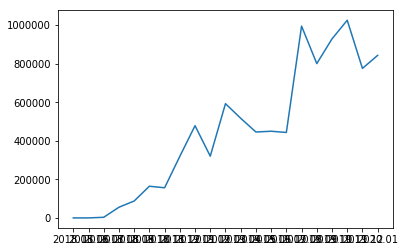

In [230]:
plt.plot(sales_by_month)

In [231]:
# Select months to plot

In [232]:
y = transactions[(transactions['Состояние'] == 'Завершён') & (transactions['Month'] == '2019.12') | (transactions['Month'] == '2019.11') | (transactions['Month'] == '2020.01')].groupby(by='Datetime')['Сумма подтверждения'].sum()

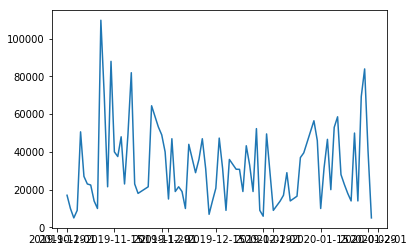

In [233]:
plt.plot(y)

In [234]:
y

Datetime
2019-11-01     16990
2019-11-02      9980
2019-11-03      4990
2019-11-04      8990
2019-11-05     50580
2019-11-06     26970
2019-11-07     22970
2019-11-08     22420
2019-11-09     13980
2019-11-10      9980
2019-11-11    109690
2019-11-12     69940
2019-11-13     21480
2019-11-14     87920
2019-11-15     39960
2019-11-16     37500
2019-11-17     47960
2019-11-18     22970
2019-11-19     48950
2019-11-20     81900
2019-11-21     22970
2019-11-22     17980
2019-11-25     21480
2019-11-26     64390
2019-11-28     53170
2019-11-29     48980
2019-11-30     39960
2019-12-01     15000
2019-12-02     46930
2019-12-03     18970
               ...  
2019-12-27     52290
2019-12-28      8990
2019-12-29      5889
2019-12-30     49480
2020-01-01      8990
2020-01-03     13880
2020-01-04     16990
2020-01-05     28950
2020-01-06     13980
2020-01-08     16490
2020-01-09     36950
2020-01-10     39460
2020-01-13     56450
2020-01-14     45970
2020-01-15      9980
2020-01-16     31460
2020

In [235]:
y.mean() # Daily average income

32633.716049382718

In [236]:
# Sales by client identified by email

In [237]:
transactions[transactions['Состояние'] == 'Завершён'].groupby(by='Email клиента')['Сумма подтверждения'].sum().sort_values(ascending=False).head(20)

Email клиента
p_kharchenko@live.ru         71940
yaroslav796@list.ru          58370
olgarossohan@gmail.com       55523
logo100333@mail.ru           54000
l.zavodova@mail.ru           51470
oay75rus@mail.ru             50970
doctor-vrach@mail.ru         50970
akropus2@gmail.com           50493
taesinandrey@yandex.ru       50024
anna-valdez@mail.ru          50024
samsonova.n1982@yandex.ru    49980
alekseevauliania@mail.ru     49980
korado-melsi@rambler.ru      49796
hank.petrov@yandex.ru        47960
juliazotov@mail.ru           47340
dvpak@mts.ru                 46500
isnp_111@mail.ru             46480
darya.tea@yandex.ru          44821
fokus.1989@list.ru           43950
dm.temchenko@mail.ru         43370
Name: Сумма подтверждения, dtype: int64

In [238]:
transactions[(transactions['Состояние'] == 'Завершён') & (transactions['Сумма подтверждения'] > 3000)].groupby(by='Email клиента')['Сумма подтверждения'].mean().head(20)


Email клиента
0001231@mail.ru                 17940.0
0220020@mail.ru                 12219.0
02@mts.ru                       11586.5
03.1980@mail.ru                  4990.0
0321000@bk.ru                   11586.5
04@mts.ru                       26880.0
11anonka11@gmail.com             8990.0
14112004n@gmail.com              8990.0
19247@m.ru                      16990.0
2000-nikita-larionov@mail.ru     4990.0
5421142@gmail.com               12219.0
5na6@mail.ru                    16990.0
5svetochka@list.ru              26880.0
7405@mail.ru                     5233.0
79062657924@mail.ru              4990.0
79110805895@m.ru                12990.0
79134887336@yandex.ru            8990.0
8808833@mail.ru                  5233.0
89110833000@mail.ru              4990.0
89194430027@mail.ru             26880.0
Name: Сумма подтверждения, dtype: float64

In [199]:
# Declined transactions

In [200]:
transactions[transactions['Состояние'] == 'Отклонён'].groupby(by='Month_general')['Код ответа процессинга'].count()

Month_general
2018.04      5
2018.05     72
2018.06     61
2018.07     54
2018.08     83
2018.09     48
2018.10     60
2018.11    102
2018.12    149
2019.01    119
2019.02     60
2019.03    207
2019.04    117
2019.05    212
2019.06    247
2019.07    135
2019.08    162
2019.09    180
2019.10    183
2019.11    182
2019.12    211
2020.01    132
Name: Код ответа процессинга, dtype: int64

In [41]:
# transactions[transactions['Состояние'] == 'Отклонён'].to_excel("/Users/stellarnode/Desktop/output.xlsx")